<H1> Load Data

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Use os.getcwd() to get the current working directory
current_dir = os.getcwd()

# Construct the path to the src directory
src_dir = os.path.join(current_dir, 'src')
stimuli_dir = os.path.join(src_dir, 'stimuli')

# Add the src and stimuli directories to the sys.path
sys.path.append(src_dir)
sys.path.append(stimuli_dir)

from stimuli import index2image
from preattentive import PreattentiveObject
from load_data import load_data

In [2]:
data = pd.DataFrame()
for data_file in ['MultipleVC', 'SingleVC']:
    df = load_data(data_file+'.tsv')
    df['data_type'] = data_file
    data = pd.concat([data, df], axis=0)
data.head(3)

,x,y,eye_movement_type,gaze_velocity,gaze_angle,path_length,reaction_time,fixation_duration,fixation_dispersion,fixation_count,...,saccade_amplitude,saccade_count,mfcc,left_pupil_diameter,right_pupil_diameter,filtered_pupil_diameter,participant,session,stimuli_index,data_type
0,"[975.0, 973.0, 964.0, 968.0, 970.0, 972.0...","[530.0, 528.0, 533.0, 532.0, 531.0, 526.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[339.4112549695428, 1235.4756169184402, 494....","[-2.356194490192345, 1.2924966677897842, 1.5...",952.978759,0.358333,"[633.0, 83.0, 675.0]","[35.0, 16.0, 27.0]",3.0,...,"[8.50614695347707, 23.964118138249173]",2.0,"[484198.8410569887, 230671.5620274861, 54556...","[3.107, 3.105, 3.104, 3.116, 3.114, 3.094...","[3.062, 3.044, 3.056, 3.066, 3.057, 3.041...","[3.076, 3.081, 3.082, 3.08, 3.083, 3.075,...",1,1,0,MultipleVC
1,"[988.0, 989.0, 989.0, 987.0, 983.0, 982.0...","[487.0, 488.0, 488.0, 491.0, 490.0, 492.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[169.7056274847714, 0.0, 432.6661530556787, ...","[0.7853981633974483, 0.7853981633974483, 1.3...",1108.301563,0.116667,"[542.0, 150.0, 83.0, 267.0]","[22.0, 34.0, 23.0, 28.0]",4.0,...,"[1.6206233929239582, 7.563322575951864, 26.1...",3.0,"[661683.2973562104, 321195.16228981456, 9288...","[3.532, 3.544, 3.547, 3.543, 3.545, 3.562...","[3.533, 3.532, 3.527, 3.542, 3.534, 3.541...","[3.534, 3.538, 3.539, 3.54, 3.544, 3.55, ...",1,1,1,MultipleVC
2,"[978.0, 979.0, 979.0, 982.0, 985.0, 987.0...","[469.0, 468.0, 466.0, 466.0, 457.0, 459.0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[169.7056274847714, 240.0, 360.0, 1138.4199...","[-0.7853981633974483, 0.7853981633974483, 0....",1118.694375,0.675000,"[542.0, 150.0, 200.0, 158.0]","[38.0, 23.0, 28.0, 18.0]",4.0,...,"[7.862168407840378, 27.711537966664768, 7.43...",3.0,"[578112.2685909539, 330526.1982731824, 11193...","[3.128, 3.121, 3.12, 3.123, 3.12, 3.109, ...","[3.071, 3.061, 3.054, 3.056, 3.047, 3.052...","[3.09, 3.09, 3.088, 3.087, 3.086, 3.084, ...",1,1,10,MultipleVC


<H1>Figure 5(a)

In [3]:
x_list, y_list = data['x'].tolist(), data['y'].tolist()
points = []
for x, y in zip(x_list, y_list):
    for item_x, item_y in zip(x, y):
        point = float(item_x.strip()), float(item_y.strip()), 1
        points.append(point)
points[:5]

[(975.0, 530.0, 1),
 (973.0, 528.0, 1),
 (964.0, 533.0, 1),
 (968.0, 532.0, 1),
 (970.0, 531.0, 1)]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

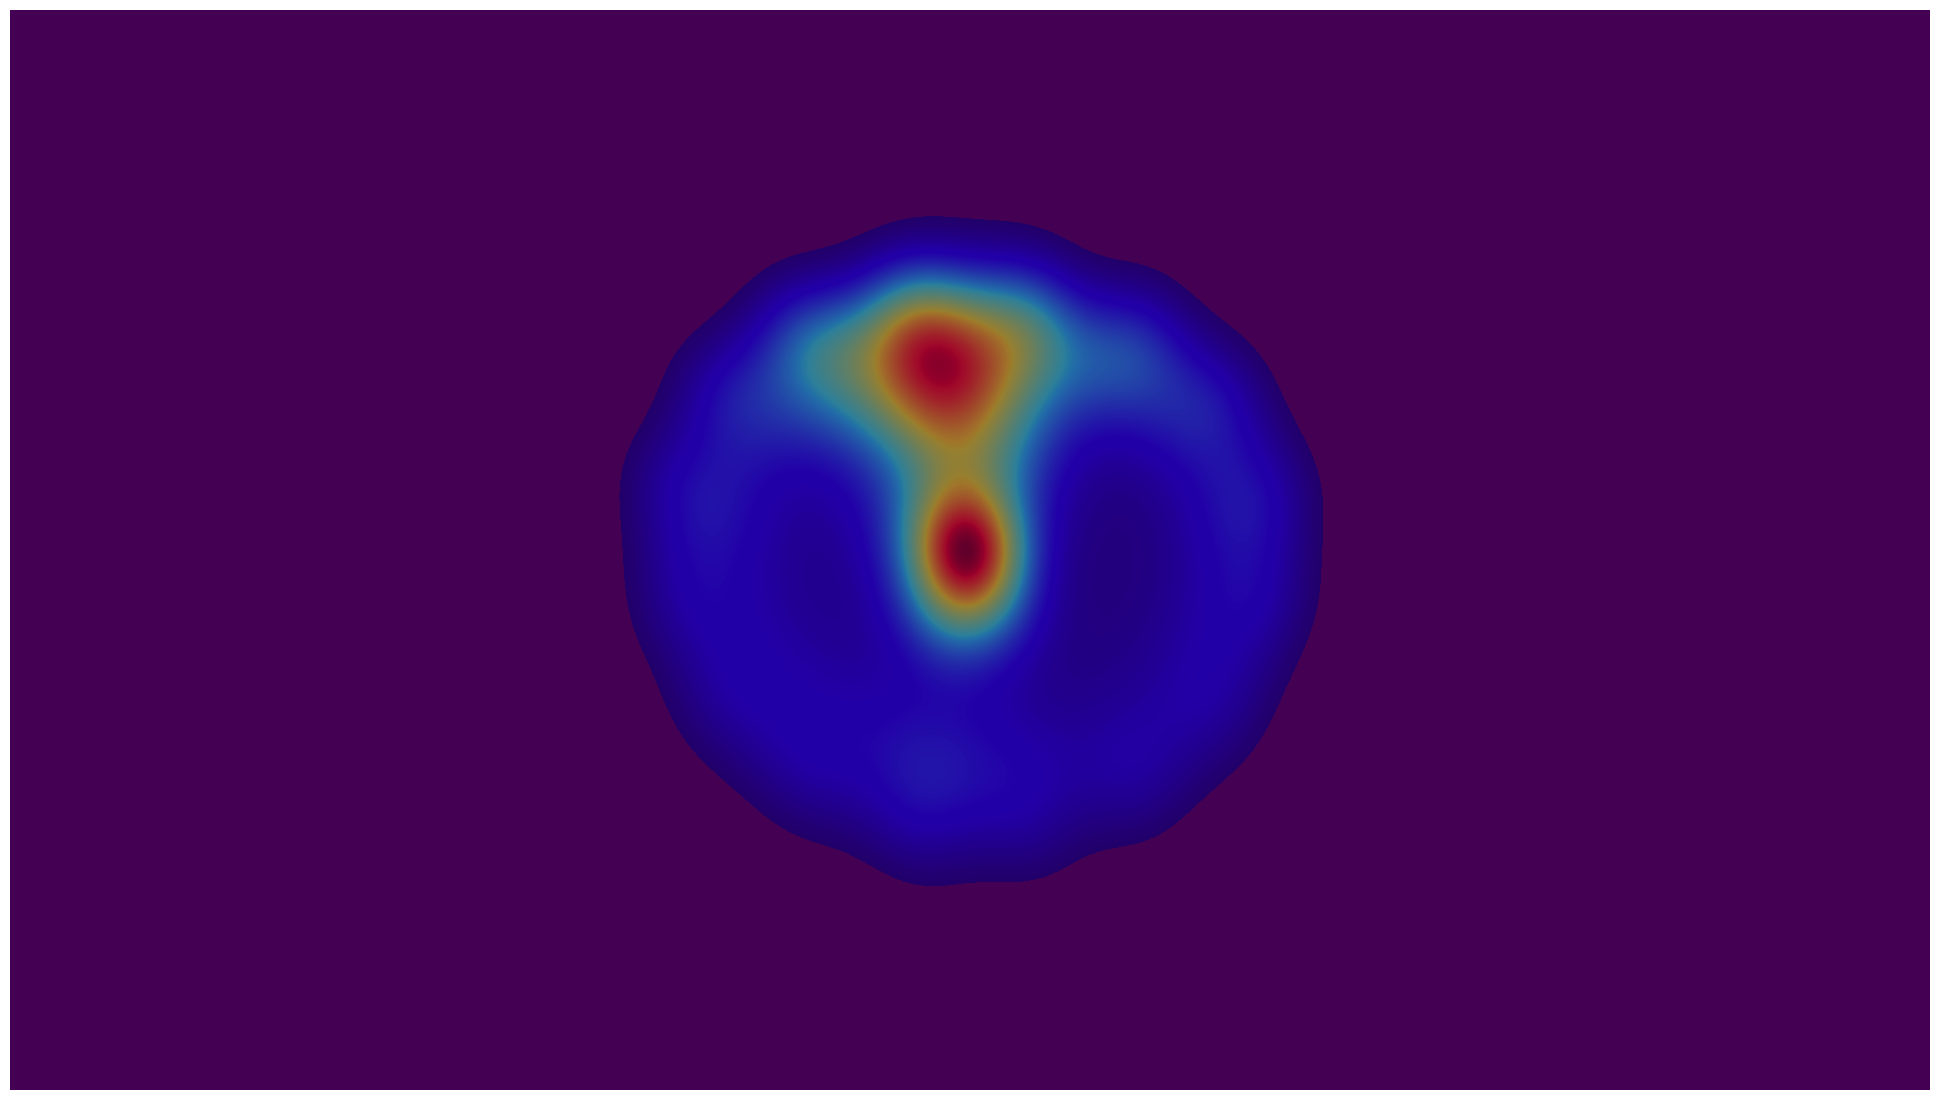

In [4]:
from src.gazeheatplot import draw_heatmap
bg = np.zeros((1090, 1920))
draw_heatmap(points, (1920, 1080), alpha=0.5, savefilename=None, imagefile=None, gaussianwh=200, gaussiansd=None, image=bg)

<H1>Figure 5(b)

In [33]:
stimuliIndexNum = 10
data_type = 'MultipleVC'

In [36]:
SingleStimuli_data = data[(data['stimuli_index'] == stimuliIndexNum) & (data['data_type'] == data_type)]
x_list = SingleStimuli_data['x'].tolist()
y_list = SingleStimuli_data['y'].tolist()
points = []
for x, y in zip(x_list, y_list):
    for item_x, item_y in zip(x, y):
        point = float(item_x.strip()), float(item_y.strip()), 1
        points.append(point)
points[:5]

[(978.0, 469.0, 1),
 (979.0, 468.0, 1),
 (979.0, 466.0, 1),
 (982.0, 466.0, 1),
 (985.0, 457.0, 1)]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

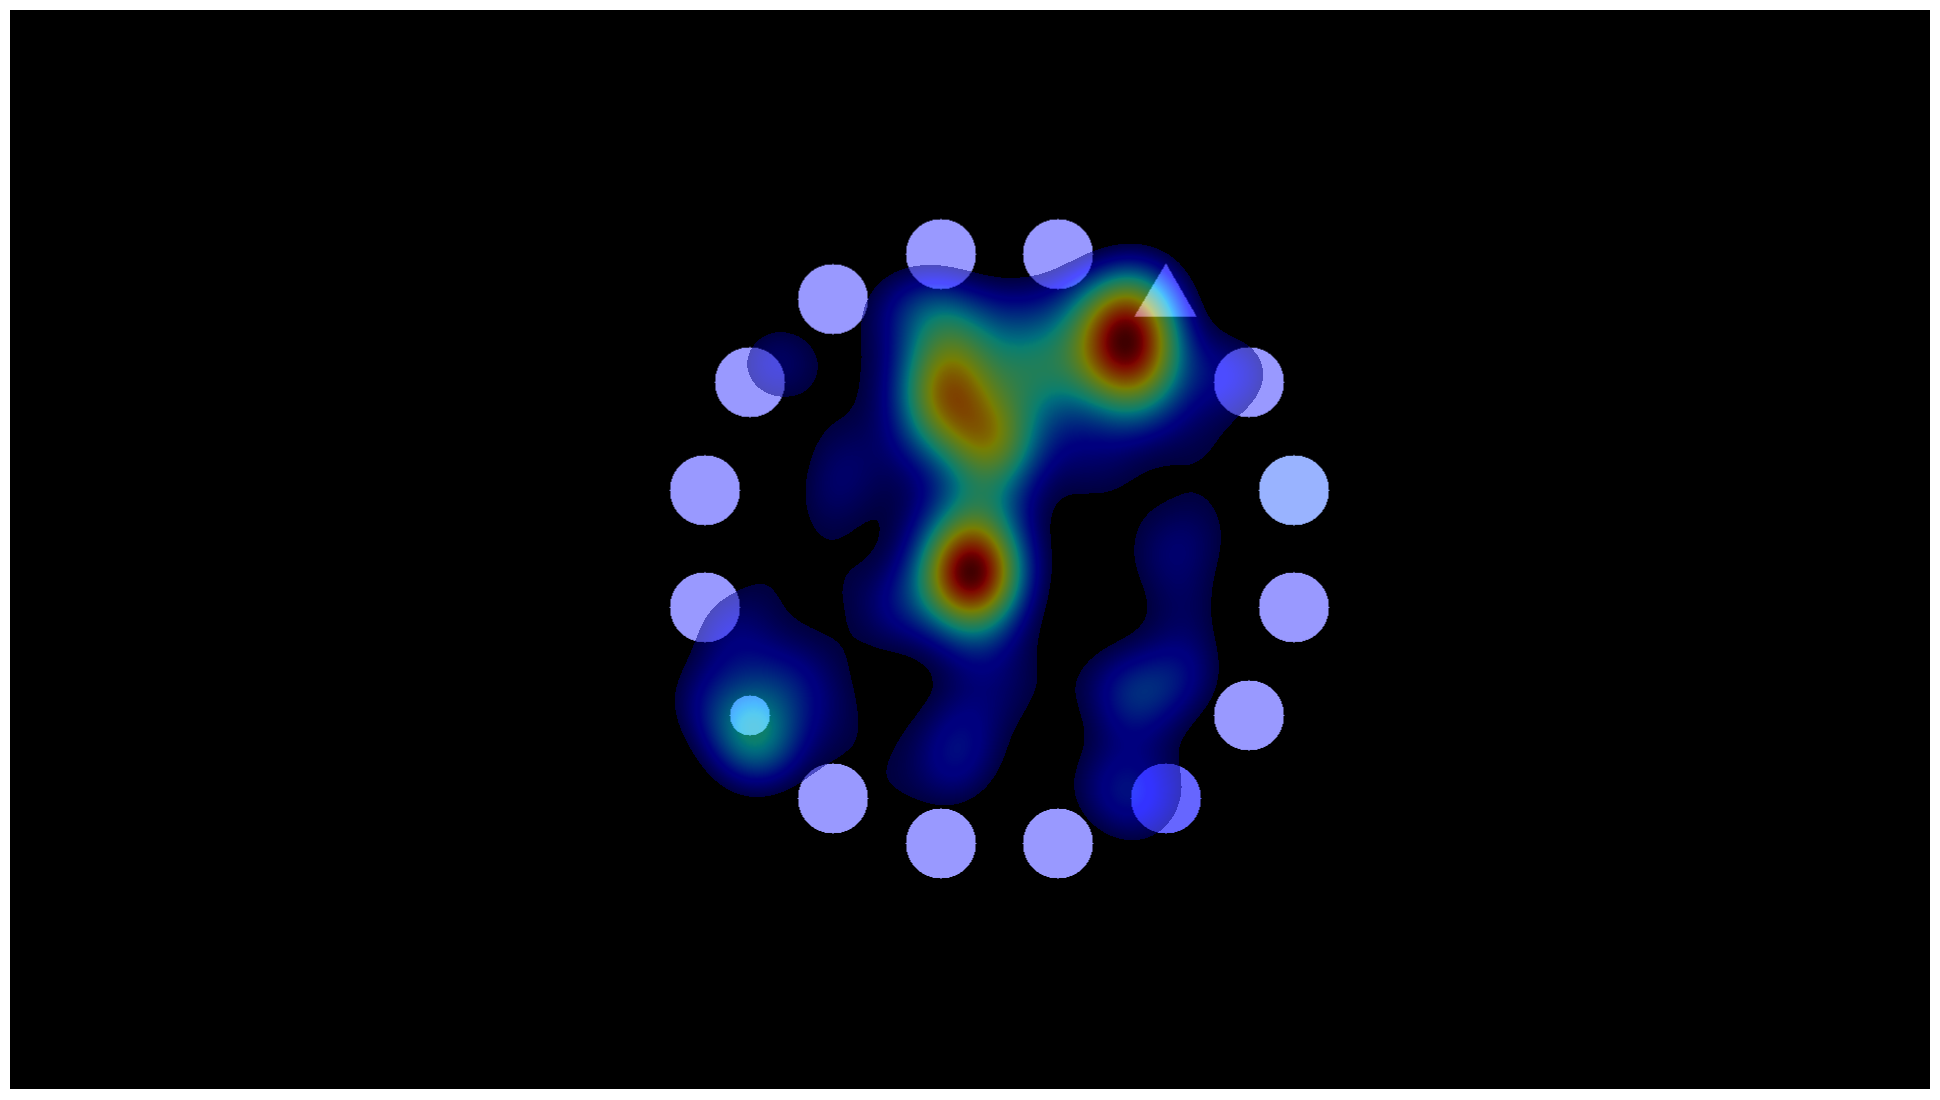

In [38]:
bg = index2image(stimuliIndexNum, data_type)
draw_heatmap(points, (1920, 1080), alpha=0.5, savefilename='heatmap.png', imagefile=None, gaussianwh=200, gaussiansd=None, image=bg)

<H1> Figure 5(c)

In [24]:
def get_gaze_points_and_bg(data_type, participant, stimuli_index):
    x_list, y_list = data[(data['participant'] == participant) & (data['stimuli_index'] == stimuli_index) & (data['data_type'] == data_type)][['x', 'y']].values[0].T
    x_list = [float(item.strip()) for item in x_list]
    y_list = [float(item.strip()) for item in y_list]
    bg = index2image(stimuli_index, data_type)
    return x_list, y_list, bg

In [27]:
# Here, change parameter if you want to get scan path
participant_list = [5, 8, 27, 32]   # participant number
stimuliIndexNum = 10
data_type = 'MultipleVC'
# ------------------------------------------------#

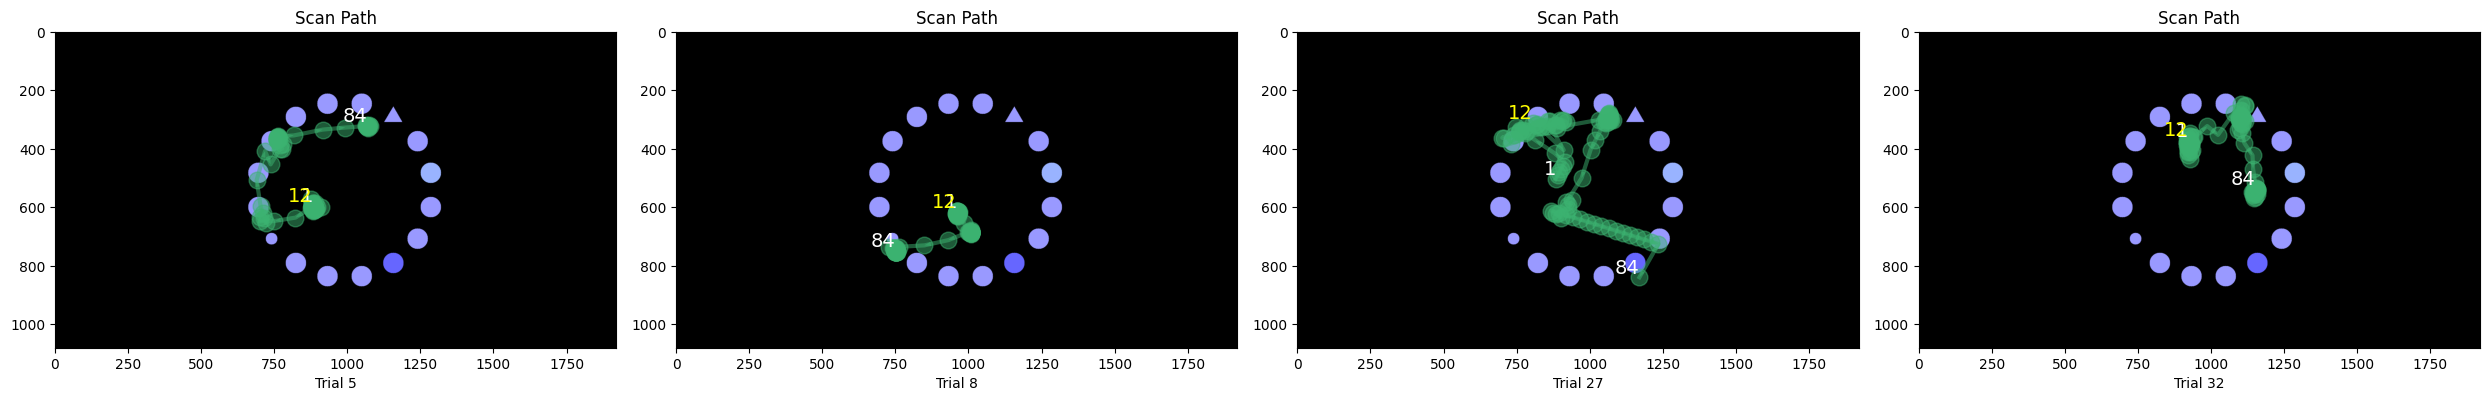

In [28]:
# get information
X_LIST = []
Y_LIST = []
BG_LIST = []
for participant in participant_list:
    # x_coords, y_coords, bg = get_gaze_points_and_bg(data_type, participant, stimuliIndexNum)
    x_coords, y_coords, bg = get_gaze_points_and_bg(data_type, participant,stimuliIndexNum)
    X_LIST.append(x_coords)
    Y_LIST.append(y_coords)
    BG_LIST.append(bg)


# for visualize
fig, axes = plt.subplots(1, len(participant_list), figsize=(25, 7))
if len(participant_list) == 1:
    axes = [axes]

for i, ax in enumerate(axes):
    ax.imshow(BG_LIST[i], cmap='gray')  # Display the image
    ax.set_title('Scan Path')
    ax.set_xlim(0, 1920)
    ax.set_ylim(0, 1080)
    ax.invert_yaxis()


for i, idx in enumerate(participant_list):
    # x_coords, y_coords, bg = get_gaze_points_and_bg(idx)
    x_coords = X_LIST[i]
    y_coords = Y_LIST[i]
    x_coords = x_coords[:84]
    y_coords = y_coords[:84]
    
    # Draw scan path
    axes[i].plot(x_coords, y_coords, marker='o', alpha=0.5, color='mediumseagreen', linewidth=3, markersize=12)
    
            # Add arrows between consecutive points to indicate direction
    for j in range(len(x_coords) - 1):
        dx = x_coords[j + 1] - x_coords[j]
        dy = y_coords[j + 1] - y_coords[j]
        axes[i].arrow(x_coords[j], y_coords[j], dx, dy, shape='full', lw=0, length_includes_head=True, head_width=15, color='mediumseagreen', alpha=0.5)

    # Add indices for ALL points
    # for j, (x, y) in enumerate(zip(x_coords, y_coords)):
    #     axes[i].text(x, y, str(j+1), fontsize=8, ha='right', va='bottom', color='white')  # Add point index

    # Add indices for the first and last points
    axes[i].text(x_coords[0], y_coords[0], '1', fontsize=14, ha='right', va='bottom', color='white')                        # 1st point
    axes[i].text(x_coords[11], y_coords[11], '12', fontsize=14, ha='right', va='bottom', color='yellow')      # 12-th point
    axes[i].text(x_coords[-1], y_coords[-1], len(x_coords), fontsize=14, ha='right', va='bottom', color='white')       # last (84) point

    axes[i].set_xlabel(f'Trial {idx}')

plt.tight_layout()
plt.show()